In [1]:
!pip3 install NRCLex
!python3 -m textblob.download_corpora

[nltk_data] Error loading brown: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>
[nltk_data] Error loading punkt: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -2] Name or service not known>
[nltk_data] Error loading conll2000: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>
[nltk_data] Error loading movie_reviews: <urlopen error [Errno -2]
[nltk_data]     Name or service not known>
Finished.


In [2]:
import os
import pandas as pd
import tweepy
import re
import string
from textblob import TextBlob
import preprocessor as p
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

import preprocessor as p
from sklearn.feature_extraction.text import CountVectorizer

from nrclex import NRCLex
from matplotlib import lines, markers

In [3]:
from cycler import cycler

# Create cycler object. Use any styling from above you please
monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':']) * cycler('marker', ['^',',', '.']))

print("number of items in monochrome:", len(monochrome))
for i, item in zip(range(15), monochrome()):
    print(i, item)

number of items in monochrome: 9
0 {'color': 'k', 'linestyle': '-', 'marker': '^'}
1 {'color': 'k', 'linestyle': '-', 'marker': ','}
2 {'color': 'k', 'linestyle': '-', 'marker': '.'}
3 {'color': 'k', 'linestyle': '--', 'marker': '^'}
4 {'color': 'k', 'linestyle': '--', 'marker': ','}
5 {'color': 'k', 'linestyle': '--', 'marker': '.'}
6 {'color': 'k', 'linestyle': ':', 'marker': '^'}
7 {'color': 'k', 'linestyle': ':', 'marker': ','}
8 {'color': 'k', 'linestyle': ':', 'marker': '.'}
9 {'color': 'k', 'linestyle': '-', 'marker': '^'}
10 {'color': 'k', 'linestyle': '-', 'marker': ','}
11 {'color': 'k', 'linestyle': '-', 'marker': '.'}
12 {'color': 'k', 'linestyle': '--', 'marker': '^'}
13 {'color': 'k', 'linestyle': '--', 'marker': ','}
14 {'color': 'k', 'linestyle': '--', 'marker': '.'}


In [4]:
January = "JSONs/1.json"
February = "JSONs/2.json"
March = "JSONs/3.json"
April = "JSONs/4.json"
May = "JSONs/5.json"
June = "JSONs/6.json"
July = "JSONs/7.json"
August = "JSONs/8.json"
September = "JSONs/9.json"
October = "JSONs/10.json"
November = "JSONs/11.json"
December = "JSONs/12.json"

In [5]:
def preprocess(df):
    testing = df['full_text']
    cleaned = []
    p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.SMILEY, p.OPT.EMOJI, 	p.OPT.NUMBER)
    for i in testing:
        cleaned.append(p.clean(i))
    df['Clean_Tweet'] = pd.Series(cleaned)
    df['Clean_Tweet'] = df['Clean_Tweet'].astype(str)
    
    return df

In [6]:
df1 = preprocess(pd.read_json(January))[["created_at","Clean_Tweet"]]
df2 = preprocess(pd.read_json(February))[["created_at","Clean_Tweet"]]
df3 = preprocess(pd.read_json(March))[["created_at","Clean_Tweet"]]
df4 = preprocess(pd.read_json(April))[["created_at","Clean_Tweet"]]
df5 = preprocess(pd.read_json(May))[["created_at","Clean_Tweet"]]
df6 = preprocess(pd.read_json(June))[["created_at","Clean_Tweet"]]
df7 = preprocess(pd.read_json(July))[["created_at","Clean_Tweet"]]
df8 = preprocess(pd.read_json(August))[["created_at","Clean_Tweet"]]
df9 = preprocess(pd.read_json(September))[["created_at","Clean_Tweet"]]
df10 = preprocess(pd.read_json(October))[["created_at","Clean_Tweet"]]
df11 = preprocess(pd.read_json(November))[["created_at","Clean_Tweet"]]
df12 = preprocess(pd.read_json(December))[["created_at","Clean_Tweet"]]

year_months = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

In [8]:
emotion_stats = {
   "fear":[0 for i in range(12)],
   "anger":[0 for i in range(12)],
   "anticipation":[0 for i in range(12)],
   "trust":[0 for i in range(12)],
   "surprise":[0 for i in range(12)],
   "sadness":[0 for i in range(12)],
   "disgust":[0 for i in range(12)],
   "joy":[0 for i in range(12)]
                }

month = -1
sum = 0
for dataset in year_months:
    month = month+1
    sum = 0
    for tweet in dataset["Clean_Tweet"]:
        text_object = NRCLex(tweet)
        emotions = set(text_object.affect_list)
        for emotion in emotions:
            if emotion != "positive" and emotion != "negative":
                emotion_stats[emotion][month] += 1
                sum += 1

In [9]:
tweet_months = []
for dataset in year_months:
    tweet_months.append(dataset["created_at"].count())

In [10]:
emotion_stats

{'fear': [2313,
  1570,
  1703,
  1632,
  1773,
  1925,
  1956,
  2028,
  2041,
  2251,
  2225,
  2041],
 'anger': [1056,
  1021,
  1048,
  1021,
  1041,
  1198,
  1194,
  1134,
  1250,
  1282,
  1273,
  1191],
 'anticipation': [1488,
  1244,
  1292,
  1353,
  1451,
  1498,
  1530,
  1438,
  1471,
  1634,
  1723,
  1545],
 'trust': [2052,
  1498,
  1643,
  1699,
  1747,
  1844,
  2041,
  1821,
  1897,
  2052,
  2060,
  1903],
 'surprise': [898, 713, 648, 656, 664, 728, 766, 765, 827, 821, 906, 836],
 'sadness': [1762,
  1222,
  1351,
  1332,
  1483,
  1650,
  1731,
  1811,
  1818,
  1936,
  2060,
  1847],
 'disgust': [880, 740, 794, 704, 725, 874, 801, 801, 879, 957, 915, 875],
 'joy': [770, 599, 825, 896, 984, 937, 1022, 956, 1025, 1032, 1163, 1069]}

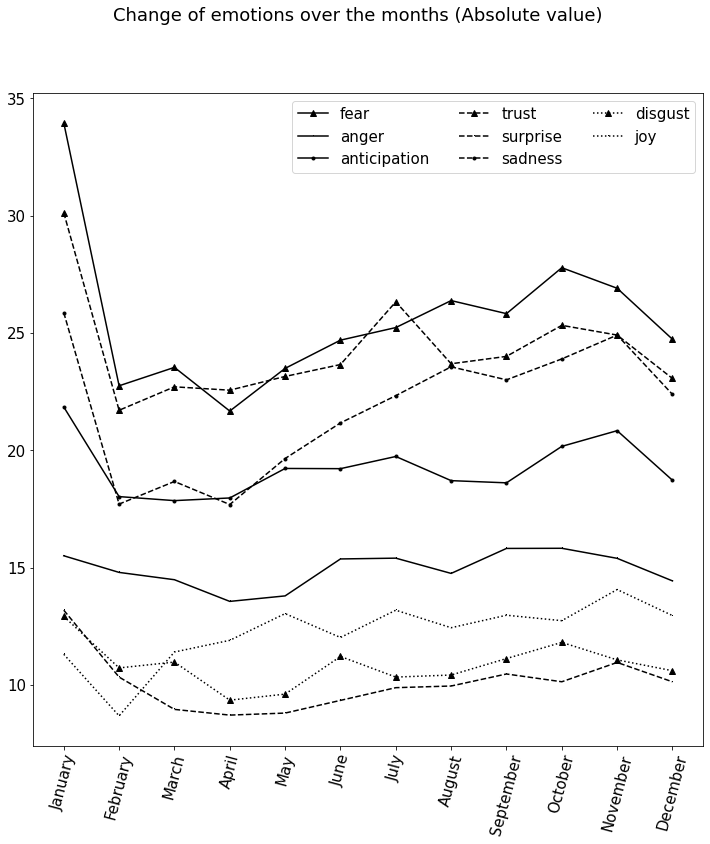

In [20]:
plt.rcParams.update({'font.size': 15})
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
serial = [0,1,2,3,4,5,6,7,8,9,10,11]

fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.set_prop_cycle(monochrome)
for emotion in emotion_stats.keys():
    ax.plot(months, emotion_stats[emotion], label = emotion) 
fig.suptitle("Change of emotions over the months (Absolute value)")
ax.set_xticks(serial)
ax.set_xticklabels(months, rotation = 75)
ax.legend(loc="upper right", ncol = 3) 
plt.show()

In [21]:
perc_stats = emotion_stats.copy()

for emotion in emotion_stats.keys():
    for i in range(12):
        perc_stats[emotion][i] = (perc_stats[emotion][i]/tweet_months[i])*100

In [22]:
perc_stats

{'fear': [0.49860183466074304,
  0.3296670923011794,
  0.3252501695197008,
  0.2878261191621297,
  0.3112863202268215,
  0.3168097179118043,
  0.32549275209513495,
  0.3432054601348666,
  0.32678268802344973,
  0.34291858049561985,
  0.3254048573892372,
  0.29972610232828295],
 'anger': [0.22763663527961292,
  0.21438859951560776,
  0.20015395047366202,
  0.18006768851993532,
  0.18276878700288843,
  0.1971626192510865,
  0.19869036094150874,
  0.1919107454600289,
  0.20013638413979035,
  0.19530058649284082,
  0.1861754532388759,
  0.17490141493041889],
 'anticipation': [0.3207607133485455,
  0.2612139253647562,
  0.246754679400736,
  0.23862055099654503,
  0.2547526512403373,
  0.24653556230227683,
  0.25460322633208404,
  0.24335771778793794,
  0.2355204968557053,
  0.24892446047527447,
  0.25198767158726104,
  0.22688722591729404],
 'trust': [0.4423393708274297,
  0.3145486014440552,
  0.31379097388189575,
  0.2996425100836142,
  0.3067214898117637,
  0.30347902328798293,
  0.33963

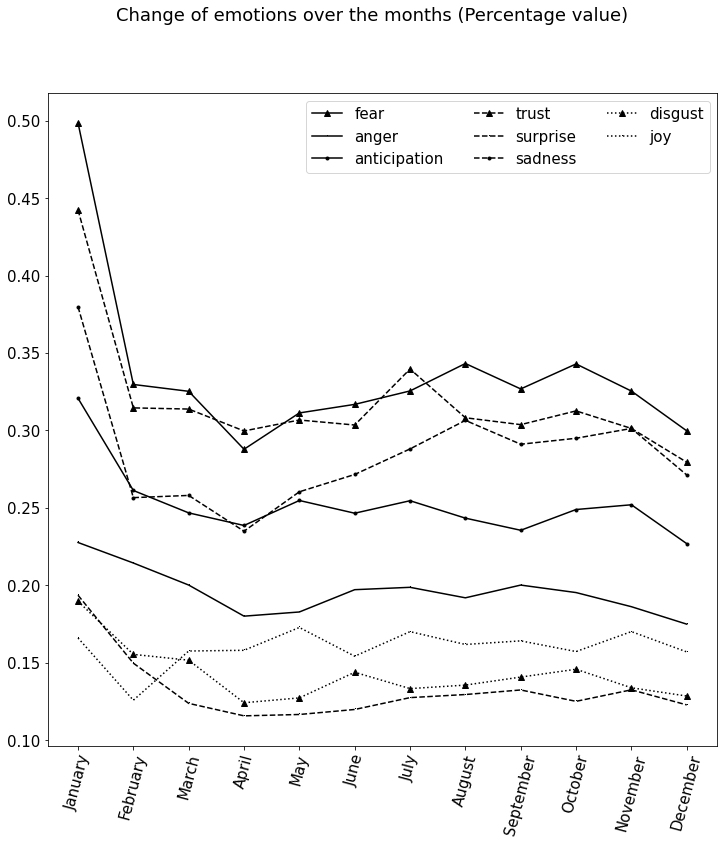

In [24]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
serial = [0,1,2,3,4,5,6,7,8,9,10,11]

fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.set_prop_cycle(monochrome)
for emotion in emotion_stats.keys():
    ax.plot(months, perc_stats[emotion], label = emotion) 
fig.suptitle("Change of emotions over the months (Percentage value)")
ax.set_xticks(serial)
ax.set_xticklabels(months, rotation = 75)
ax.legend(loc="upper right", ncol = 3) 
plt.show()